# Scrape for Article Dates

To collect the article dates, each page of the justice.gov 'hate crime' search query are looped through and the dates are put into a list. 

In [1]:
# Imports

import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime  
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
import statsmodels.api as ss

import pandas as pd

## Scraping

In [2]:
Date_List = []

#Looping through the pages

for i in range(16):
    
    link = 'https://www.justice.gov/news?sort=field_pr_date&order=desc&keys=hate%20crime&items_per_page=50&page={}'.format(i)
    page = requests.get(link)
    soup=BeautifulSoup(page.text,'html.parser')
    
    headline_news = soup.find_all("div", attrs={'class': 'views-field views-field-title'})
    date = soup.find_all('span', attrs = {'class': 'date-display-single'})

    
    
    
    
# Create List of dates
    for d in date:
        
        Dates = d.get_text()
        #print(Dates)
    
        Date_List.append(Dates)
    
#print(type(Date_List)  )




## Data Processing

The dates we have scraped are in the format of 'Month Day, Year' with the month being spelled out. These dates are made into usable data by converting into 'Datetime' objects.  Once this is completed, they are stored into a dictionary with the years as the keys and each month's total number of articles are the values. 

In [3]:
# Create dictionary

e = 12 * [0]
year_dict = {2009: e.copy(), 2010: e.copy(),2011: e.copy(),2012: e.copy(), 
          2013: e.copy(), 2014: e.copy(), 2015: e.copy(), 2016: e.copy(), 
          2017: e.copy(), 2018: e.copy(),2019: e.copy(),2020: e.copy(), 
          2021: e.copy(), 2022: e.copy()}
months = 12 * [0]
dates = []
#print(year_dict)


# Turns List of dates into List of Datetime Objects
for date in Date_List:
    dates.append(datetime.strptime(date, '%B %d, %Y'))

#print(dates)
#for date in dates:
    #months[date.month-1] = months[date.month-1] + 1


for i in dates:
    
    year_dict[i.year][i.month-1] = year_dict[i.year][i.month-1] + 1
#print(year_dict)

Linear Regression of Number of Articles posted vs Months

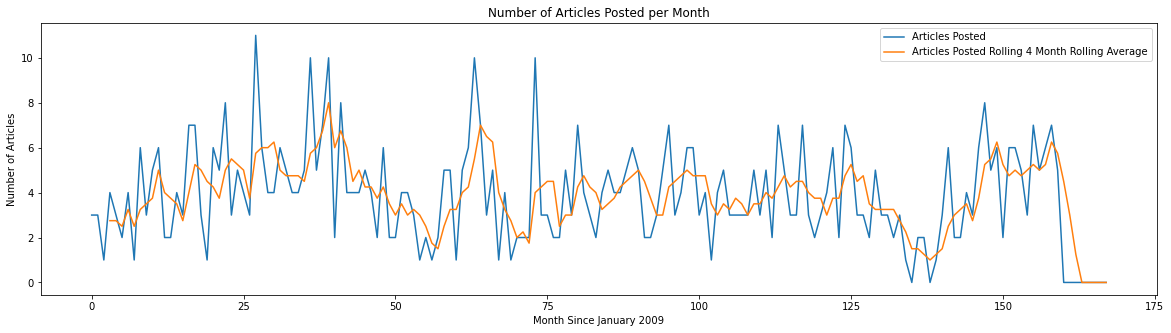

In [4]:
# Creating y list of articles per month

y_month = []

for value in year_dict.values():
    y_month.extend(value)
#print(y_month)  

y_month_ra = y_month

# Reshape lists for regression



np_y_month = np.array(y_month)

x_reg = np.array([*range(0,len(y_month),1)])

y_month = np.reshape(np_y_month, (-1,1))
x_reg = np.reshape(x_reg, (-1,1))
#xy_reg = (x_reg, y_reg)
#print(len(y_month))


# Figure shaping 
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)



months_year = ['January_', 'February_', 'March_', 'April_', 'May_', 'June_',
            'July_', 'August_', 'September_', 'October_', 'November_', 'December_']

years_ind = [*range(2009, 2023, 1)]
str_yrs = [str(x) for x in years_ind]



plt.plot(y_month)

y_month_df = pd.DataFrame(y_month_ra)

#print(y_month)



plt.xlabel('Month Since January 2009')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Posted per Month')


y_month_df = pd.DataFrame(y_month_ra)
y_month_ra = y_month_df.rolling(window = 4, center = False).mean()

plt.plot(y_month_ra)
plt.legend(['Articles Posted', 'Articles Posted Rolling 4 Month Rolling Average'])
plt.show()

Rolling average of 4 months plotted over number of articles posted per month.






Graphing the number of articles per month by year

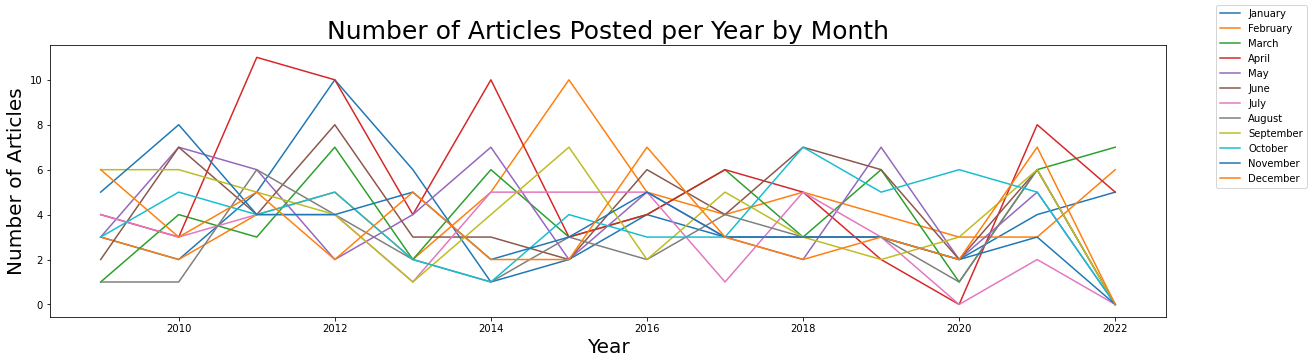

In [5]:
# Creating empy month arrays

Jan = []
Feb = []
Mar = []
Apr = []
May = []
Jun = []
Jul = []
Aug = []
Sep = []
Oct = []
Nov = []
Dec = []
i = 0

years = [*range(2009, 2023, 1)]
#print(years)

years_reg = np.reshape(years, (-1,1))

# Filling month arrays with the number of articles posted per month 
# for that year

for key in year_dict.keys():
    while i <= 13:
        
        Jan.append(list(year_dict.values())[i][0])
        Feb.append(list(year_dict.values())[i][1])
        Mar.append(list(year_dict.values())[i][2])
        Apr.append(list(year_dict.values())[i][3])
        May.append(list(year_dict.values())[i][4])
        Jun.append(list(year_dict.values())[i][5])
        Jul.append(list(year_dict.values())[i][6])
        Aug.append(list(year_dict.values())[i][7])
        Sep.append(list(year_dict.values())[i][8])
        Oct.append(list(year_dict.values())[i][9])
        Nov.append(list(year_dict.values())[i][10])
        Dec.append(list(year_dict.values())[i][11])
        
        i = i + 1
        
 
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(5)

#Plotting all of the the arrays against years

plt.plot(years, Jan)
plt.plot(years, Feb)
plt.plot(years, Mar)
plt.plot(years, Apr)
plt.plot(years, May)
plt.plot(years, Jun)
plt.plot(years, Jul)
plt.plot(years, Aug)
plt.plot(years, Sep)
plt.plot(years, Oct)
plt.plot(years, Nov)
plt.plot(years, Dec)



# legend 
fig.legend(['January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'])


plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Articles', fontsize = 20)
plt.title('Number of Articles Posted per Year by Month', fontsize = 25)





plt.show()


Plotting number of articles posted per year by month is not very useful.

Linear Regression of Number of Articles Posted vs Number of Hatecrimes committed per month 2009-2020

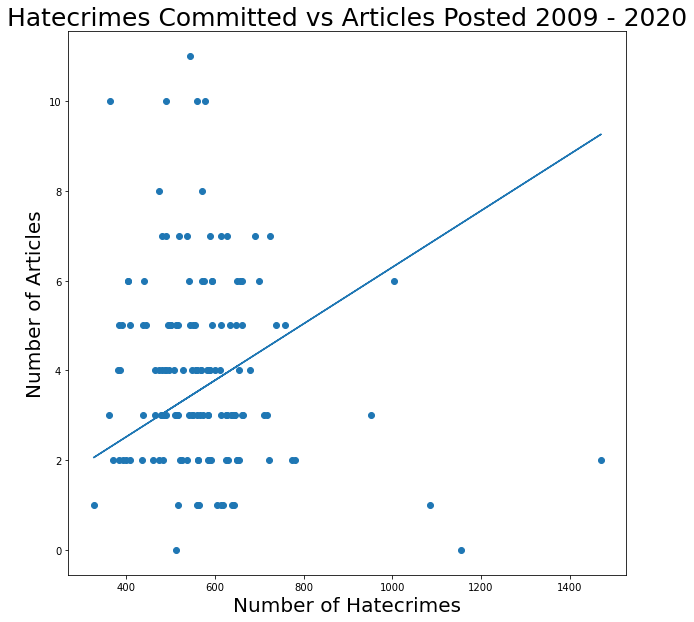

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.700
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              333.4
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    3.39e-39
Time:                        14:21:24   Log-Likelihood:                         -332.72
No. Observations:                 144   AIC:                                      667.4
Df Residuals:                     143   BIC:                                      670.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
# Read csv file containing Hatecrimes committed per month

df = pd.read_csv('Data/monthly_totals.csv')
df = df.iloc[18:30, 1:]

# Hatecrime per Month
hpm = []

# Taking only data from 2009 - 2020
for i in range(df.shape[0]):
  hpm.extend(df.iloc[i].values)

hpm = np.array(hpm)


#print(hpm)

# Articles per Month
apm = []

for value in year_dict.values():
    apm.extend(value)
del apm[-24:]

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

apm = np.array(apm)

# reshaping data

apm_reg = np.reshape(apm, (-1,1))
hpm_reg = np.reshape(hpm, (-1,1))



# Preforming Linear Regression
regdata = ss.OLS(apm_reg, hpm_reg).fit()

pred = regdata.predict(hpm_reg)

plt.plot(hpm_reg, pred)

plt.scatter(hpm, apm)


plt.xlabel('Number of Hatecrimes', fontsize = 20)
plt.ylabel('Number of Articles', fontsize = 20)
plt.title('Hatecrimes Committed vs Articles Posted 2009 - 2020', fontsize = 25)




plt.show()

print(regdata.summary())

The R-squared is 0.700 which means 70.0% of the variance in articles posted can be predicted by the number of hate crimes committed. The coefficient is small but significant, showing that for an increase in 100 hate crimes we would expect to see only 0.6 additional news articles.

**Take out 2020**

Because 2020 had much higher values than other years, we also run a model on 2009-2019.
Linear Regression of Number of Articles Posted vs Number of Hatecrimes committed per month 2009-2019. 

The year of 2020 contained some data points that scew the plot. Removal of the year 2020 to see what changes.

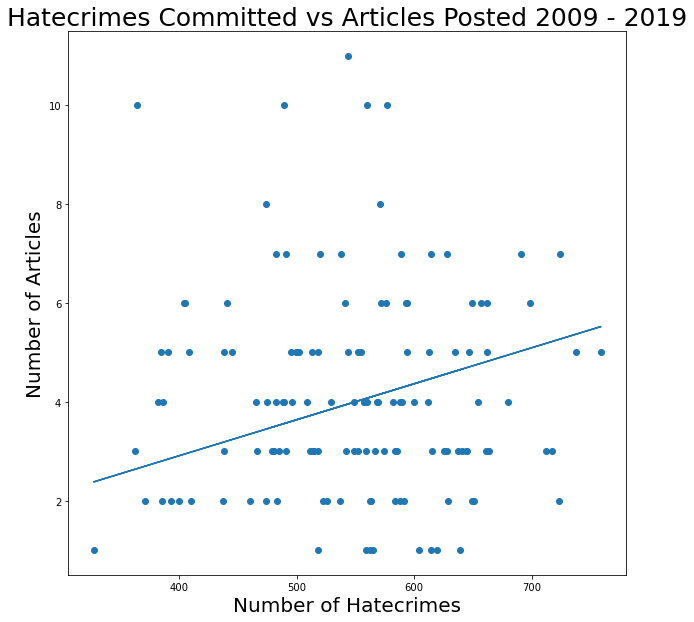

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              453.1
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    2.37e-44
Time:                        14:21:24   Log-Likelihood:                         -289.72
No. Observations:                 132   AIC:                                      581.4
Df Residuals:                     131   BIC:                                      584.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
df = pd.read_csv('Data/monthly_totals.csv')
df = df.iloc[18:30, 1:]

# Hatecrime per Month
hpm = []
for i in range(df.shape[0]):
  hpm.extend(df.iloc[i].values)

del hpm[-12:]

hpm = np.array(hpm)




# Articles per Month
apm = []

for value in year_dict.values():
    apm.extend(value)
del apm[-36:]

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

apm = np.array(apm)


apm_reg = np.reshape(apm, (-1,1))
hpm_reg = np.reshape(hpm, (-1,1))


regdata = ss.OLS(apm_reg, hpm_reg).fit()

pred = regdata.predict(hpm_reg)

plt.plot(hpm_reg, pred)

plt.scatter(hpm, apm)


plt.xlabel('Number of Hatecrimes', fontsize = 20)
plt.ylabel('Number of Articles', fontsize = 20)
plt.title('Hatecrimes Committed vs Articles Posted 2009 - 2019', fontsize = 25)




plt.show()

print(regdata.summary())

When the year 2020 is removed from the analysis, the R-squared is improved to 0.776. This means that 77.6% of the variance in number of articles posted can be explained by number of hate crime committed. This is 7.76% higher than when 2022 is included. The coefficient is slightly higher, 0.0073 instead of 0.0063, showing a small, but positive effect.